In [1]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\\Users\\pc-e\\data\\train.csv')
test = pd.read_csv('C:\\Users\\pc-e\\data\\test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
##Missing Data

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

average amount of people survived =  38 %


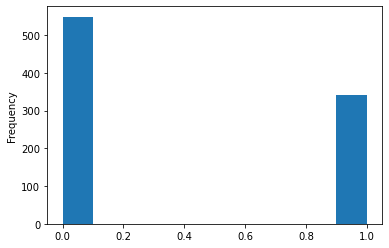

In [6]:
##Feature: Survived

train.Survived.plot.hist()
mean_s = np.mean(train.Survived)
print('average amount of people survived = ', int(mean_s*100),'%')

In [7]:
a = train.loc[train['Survived'] == 1]
b = a.loc[a['Sex'] == 'female']
def counter(a):
    count_f = 0
    count_m = 0
    for i in a:
        if i == str("female"):
            count_f = count_f +1
        else:
            count_m = count_m +1           
    return print("No of Male survived =",count_m,"No of Female survived =", count_f)

No of Male survived = 109 No of Female survived = 233


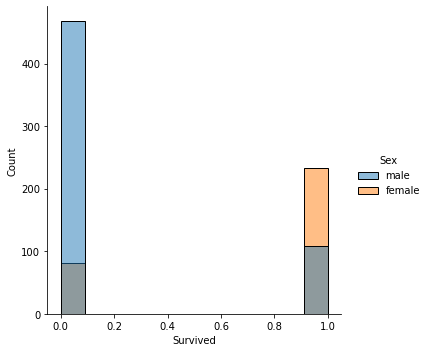

In [8]:
sns.displot(train, x= 'Survived', hue = 'Sex')
counter(a.Sex)

In [9]:
def class_counter(a):  #Counts number of surviving passengers per class
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in a:
        if i == 1:
            count_1 = count_1 + 1
        elif i == 2:
            count_2 = count_2 +1
        elif i == 3:
            count_3 = count_3 + 1    
    return print("No of Class 1 passengers that survived =",count_1,",No of Class 2 passengers that survived =", count_2, "No of Class 3 passengers that  survived =", count_3)

def class_counter_sex(b): # Counts the number of surving females per class
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in b:
        if i == 1:
            count_1 = count_1 + 1
        elif i == 2:
            count_2 = count_2 +1
        elif i == 3:
            count_3 = count_3 + 1
    return print("No of females in Class 1 that survived =",count_1,",No of females in Class 2 that survived =", count_2, "No, of females in Class 3 that survived =", count_3)

No of Class 1 passengers that survived = 136 ,No of Class 2 passengers that survived = 87 No of Class 3 passengers that  survived = 119

No of females in Class 1 that survived = 91 ,No of females in Class 2 that survived = 70 No, of females in Class 3 that survived = 72

Survival rates (%) of females in each class: Class 1 = 66 ,Class 2 = 80 ,Class 3 = 60
Survival rates (%) of males in each class: Class 1 = 33 ,Class 2 = 19 ,Class 3 = 39


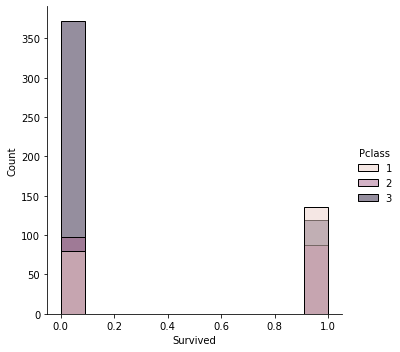

In [10]:
sns.displot(train, x= 'Survived', hue = 'Pclass')
class_counter(a.Pclass)
print()
class_counter_sex(b.Pclass)
print()

avg_class1 = 91/136 * 100
avg_class2 = 70/ 87 * 100
avg_class3 = 72/119 * 100

print('Survival rates (%) of females in each class: Class 1 =', int(avg_class1), ',Class 2 =',int(avg_class2), ',Class 3 =', int(avg_class3))
avg_class1_m = (136-91)/136 * 100
avg_class2_m = (87-70)/ 87 * 100
avg_class3_m = (119-72)/119 * 100

print('Survival rates (%) of males in each class: Class 1 =', int(avg_class1_m), ',Class 2 =',int(avg_class2_m), ',Class 3 =', int(avg_class3_m))

In [11]:
def sibling_counter(a):
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in a:
        if i == 0:
            count_1 = count_1 + 1
        elif i <= 3:
            count_2 = count_2 +1
        elif i >= 3:
            count_3 = count_3 + 1    
    return print("Surviving passenger with 0 parents/children =",count_1,"Surviving passenger with less then 3 parents/children =", count_2, "Surviving passenger with more than 3 parents/children =", count_3)

Surviving passenger with 0 parents/children = 210 Surviving passenger with less then 3 parents/children = 129 Surviving passenger with more than 3 parents/children = 3


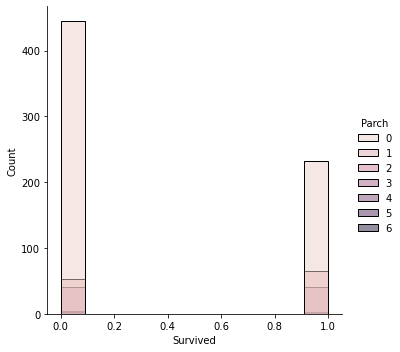

In [12]:
sns.displot(train, x= 'Survived', hue = 'Parch')
sibling_counter(a.SibSp)

In [13]:
def sibling_counter(a): #counts number of siblings/parteners each surving passenger had
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in a:
        if i == 0:
            count_1 = count_1 + 1
        elif i <= 3:
            count_2 = count_2 +1
        elif i >= 3:
            count_3 = count_3 + 1
    return print("Surviving passenger with 0 siblings =",count_1,"Surviving passenger with less then 3 siblings =", count_2, "Surviving passenger with more than 3 siblings =", count_3)


Surviving passenger with 0 siblings = 210 Surviving passenger with less then 3 siblings = 129 Surviving passenger with more than 3 siblings = 3


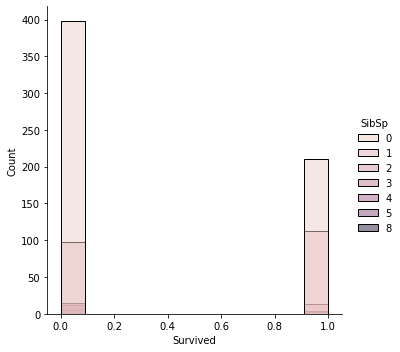

In [14]:
sns.displot(train, x= 'Survived', hue = 'SibSp')
sibling_counter(a.SibSp)

In [15]:
##Feature: Sex

def count_sex(a):
    count_ = 0
    count_f = 0
    for i in a:
        if i == 'male':
            count_ = count_ +1
        else:
            count_f = count_f + 1
    return print('No of males =', count_, 'No of females = ', count_f)

No of males = 577 No of females =  314
Average amount of passengers that are female =  35 %


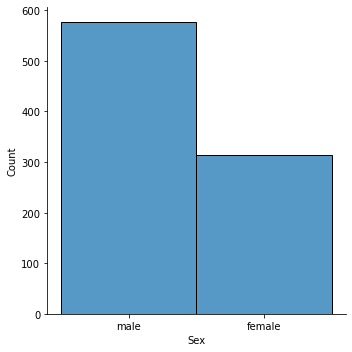

In [16]:
sns.displot(train, x= 'Sex')
count_sex(train.Sex)
print("Average amount of passengers that are female = ", int(314/(314 + 577)* 100),'%')

In [17]:
##Feature: Pclass
def class_counter(a):
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in a:
        if i == 1:
            count_1 = count_1 + 1
        elif i == 2:
            count_2 = count_2 +1
        elif i == 3:
            count_3 = count_3 + 1
    return print("No of Class 1 passengers =",count_1,",No of Class 2 passengers =", count_2, ",No of Class 3 passengers =", count_3)

No of Class 1 passengers = 216 ,No of Class 2 passengers = 184 ,No of Class 3 passengers = 491


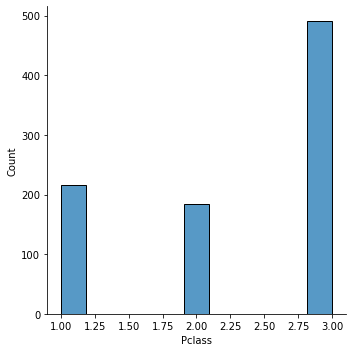

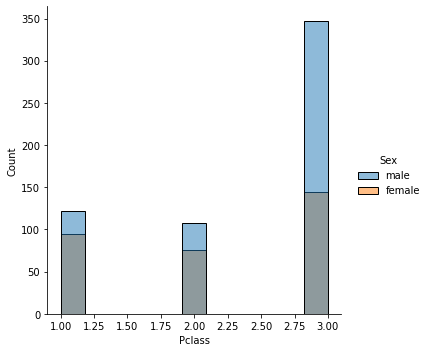

In [18]:
sns.displot(train, x= train['Pclass'])
sns.displot(train, x= train['Pclass'], hue = "Sex")
class_counter(train.Pclass)

Average age of passengers =  29
Average age of surviving passengers =  28


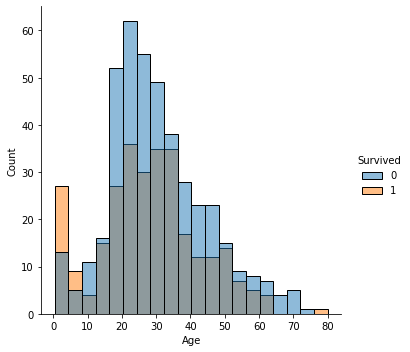

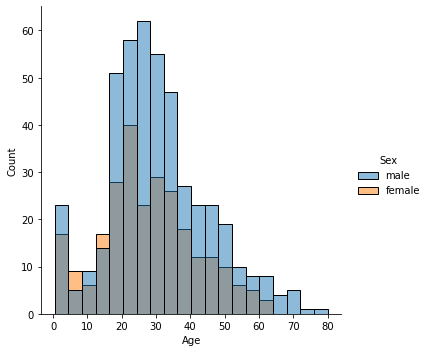

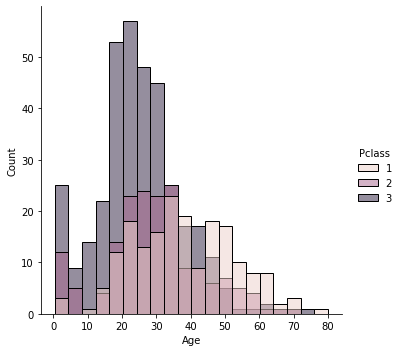

In [19]:
##Feature: Age

a = train.loc[train['Survived'] == 1]
c = a['Age'] 

sns.displot(train, x= train['Age'], hue = 'Survived')
sns.displot(train, x= train['Age'], hue = 'Sex')
sns.displot(train, x= train['Age'], hue = 'Pclass')

print("Average age of passengers = ", int(np.mean(train.Age)))
print("Average age of surviving passengers = ", int(np.mean(c)))

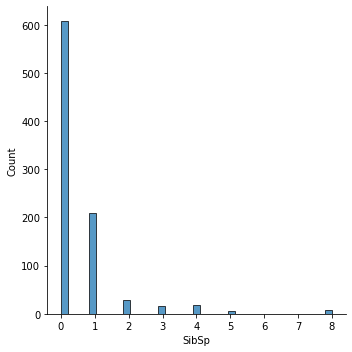

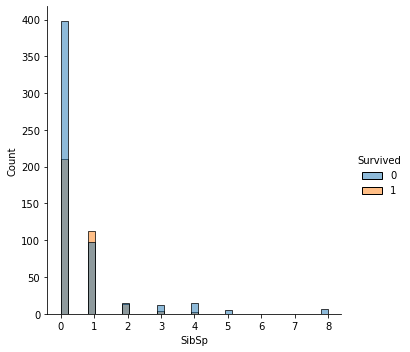

In [20]:
##Feature: SibSp
sns.displot(train, x= train['SibSp'], )
sns.displot(train, x= train['SibSp'], hue = 'Survived')


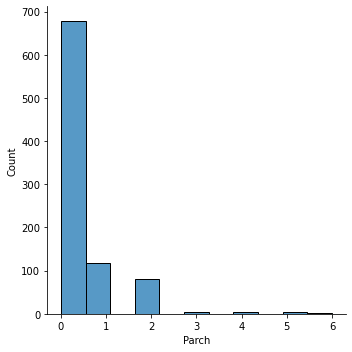

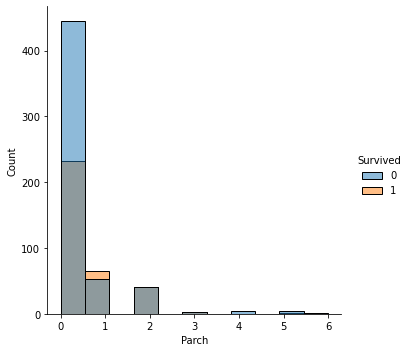

In [21]:
##Feature: Parch

sns.displot(train, x= train['Parch'], )
sns.displot(train, x= train['Parch'], hue = 'Survived')

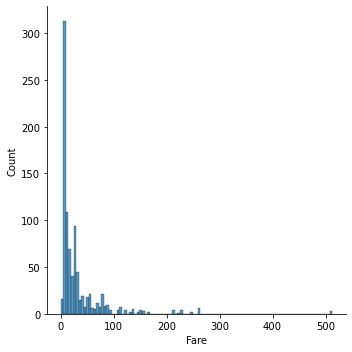

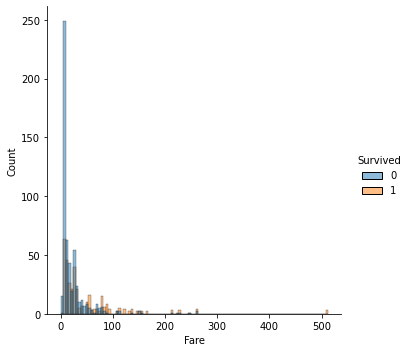

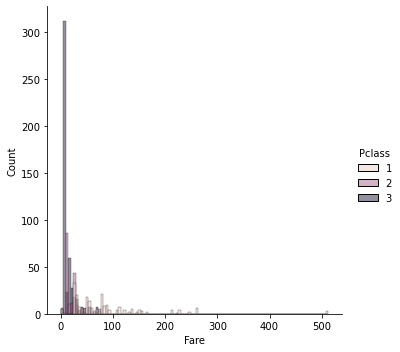

In [22]:
##Feature: Fare

sns.displot(train, x= train['Fare'], )
sns.displot(train, x= train['Fare'], hue = 'Survived')
sns.displot(train, x= train['Fare'], hue = 'Pclass')

In [23]:
##Dealing with Missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
train['Age'] = train['Age'].fillna(np.mean(train.Age)) #fill missing values with mean values of age
train['Embarked'] = train['Embarked'].fillna('backfill')

In [25]:
train = train.drop(columns ='Cabin')

In [26]:
#one hot encode binned variables
one_hot_cols = train.columns.tolist()
one_hot_cols.remove('Survived')
one_hot_cols.remove('Fare')
df_bin_enc = pd.get_dummies(train, columns=one_hot_cols)
df_bin_enc.head()

,Survived,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,...,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_backfill
0,0,7.2500,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,71.2833,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,7.9250,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,53.1000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,8.0500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
#one_hot encode categorical values
df_sex = pd.get_dummies(train['Sex'], prefix='sex')
df_Pclass = pd.get_dummies(train['Pclass'],prefix = 'pclass')
df_train = pd.concat([df_bin_enc,
                     df_sex,
                     df_Pclass], axis = 1)
df_train.describe()

,Survived,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,...,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_backfill,sex_female,sex_male,pclass_1,pclass_2,pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,32.204208,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,...,0.002245,0.188552,0.086420,0.722783,0.002245,0.352413,0.647587,0.242424,0.206510,0.551066
std,0.486592,49.693429,0.033501,0.033501,0.033501,0.033501,0.033501,0.033501,0.033501,0.033501,...,0.047351,0.391372,0.281141,0.447876,0.047351,0.477990,0.477990,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
##MODEL

X_train = df_train.drop('Survived', axis = 1)
y_train = df_train.Survived

In [29]:
X_train.head()

,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,PassengerId_9,...,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_backfill,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,7.2500,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,71.2833,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,7.9250,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,53.1000,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,8.0500,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [30]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
def fit_ml_algo(algo,x_train,y_train,cv):
    model = algo.fit(x_train,y_train)
    accuracy = round(model.score(x_train,y_train)*100,2)
    
    train_pred = model_selection.cross_val_predict(algo,
                                                  x_train,
                                                   y_train,
                                                   cv = cv,
                                                   n_jobs = -1)
    
    accuracy_cv = round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred, accuracy, accuracy_cv

In [32]:
# LOGISTIC REGRESION
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 94.95
Accuracy CV 10-Fold: 80.81
Running Time: 0:00:17.923853


In [33]:
##K- NEAREST NEIGHBOURS
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 85.41
Accuracy CV 10-Fold: 78.34
Running Time: 0:00:02.496289


In [34]:
##GAUSSIAN NAIVE BAYES
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 49.05
Running Time: 0:00:01.662999


In [35]:
#LINEAR SUPPORT VECTOR MACHINES(SVC)


start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 98.99
Accuracy CV 10-Fold: 81.71
Running Time: 0:00:01.289868


In [36]:
##STOCHASTIC GRADIENT DESCENT
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 65.43
Accuracy CV 10-Fold: 72.62
Running Time: 0:00:01.581228


In [37]:
#DECISION TREE CLASSIFIER


start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 79.12
Running Time: 0:00:01.826781


In [38]:
#GRADIENT BOOSTING TREES 


start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 85.19
Accuracy CV 10-Fold: 80.92
Running Time: 0:00:18.859080


In [39]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([   1,    2,    3, ..., 2578, 2579, 2580], dtype=int64)

In [40]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [41]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6873145	total: 197ms	remaining: 3m 17s
1:	learn: 0.6836645	total: 212ms	remaining: 1m 45s
2:	learn: 0.6777754	total: 240ms	remaining: 1m 19s
3:	learn: 0.6719158	total: 261ms	remaining: 1m 5s
4:	learn: 0.6666338	total: 278ms	remaining: 55.3s
5:	learn: 0.6612144	total: 293ms	remaining: 48.5s
6:	learn: 0.6566804	total: 310ms	remaining: 44s
7:	learn: 0.6514494	total: 326ms	remaining: 40.4s
8:	learn: 0.6461103	total: 345ms	remaining: 38s
9:	learn: 0.6413389	total: 366ms	remaining: 36.2s
10:	learn: 0.6366710	total: 386ms	remaining: 34.7s
11:	learn: 0.6321150	total: 406ms	remaining: 33.4s
12:	learn: 0.6267614	total: 424ms	remaining: 32.2s
13:	learn: 0.6222598	total: 442ms	remaining: 31.1s
14:	learn: 0.6178684	total: 461ms	remaining: 30.2s
15:	learn: 0.6138808	total: 479ms	remaining: 29.5s
16:	learn: 0.6091791	total: 495ms	remaining: 28.6s
17:	learn: 0.6054786	total: 511ms	remaining: 27.9s
18:	learn: 0.6018379	total: 530ms	remaining: 27.4s
19:	learn: 0

In [42]:
##PERFORM CATBOOST CROSS-VALIDATION

# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6734315	test: 0.6805538	best: 0.6805538 (0)	total: 19.5ms	remaining: 19.5s
1:	learn: 0.6559057	test: 0.6687370	best: 0.6687370 (1)	total: 38.8ms	remaining: 19.4s
2:	learn: 0.6411070	test: 0.6586054	best: 0.6586054 (2)	total: 55.6ms	remaining: 18.5s
3:	learn: 0.6260498	test: 0.6488438	best: 0.6488438 (3)	total: 70.1ms	remaining: 17.5s
4:	learn: 0.6168996	test: 0.6407452	best: 0.6407452 (4)	total: 87.8ms	remaining: 17.5s
5:	learn: 0.6049333	test: 0.6335569	best: 0.6335569 (5)	total: 102ms	remaining: 16.8s
6:	learn: 0.5933139	test: 0.6256485	best: 0.6256485 (6)	total: 117ms	remaining: 16.6s
7:	learn: 0.5812942	test: 0.6175464	best: 0.6175464 (7)	total: 136ms	remaining: 16.8s
8:	learn: 0.5699355	test: 0.6095266	best: 0.6095266 (8)	total: 150ms	remaining: 16.5s
9:	learn: 0.5592546	test: 0.6025337	best: 0.6025337 (9)	total: 171ms	remaining: 16.9s
10:	learn: 0.5499363	test: 0.5969398	best: 0.5969398 (10)	total: 184ms	remaining: 16.5s
11:	learn: 0.5388048	te

In [43]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 85.52
Accuracy cross-validation 10-Fold: 81.15
Running Time: 0:03:22.719332


In [44]:
##MODEL RESULTS
#Regular accuracy scores

models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
2,Naive Bayes,100.00
5,Decision Tree,100.00
4,Linear SVC,98.99
1,Logistic Regression,94.95
7,CatBoost,85.52
0,KNN,85.41
6,Gradient Boosting Trees,85.19
3,Stochastic Gradient Decent,65.43


In [45]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost],
     'time':   [
         log_time,
         knn_time,
         gaussian_time,
         linear_svc_time,
         sgd_time,
         dt_time,
         gbt_time,
         catboost_time]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score,time
4,Linear SVC,81.71,1.581228
7,CatBoost,81.15,202.719332
6,Gradient Boosting Trees,80.92,18.859080
1,Logistic Regression,80.81,2.496289
5,Decision Tree,79.12,1.826781
0,KNN,78.34,17.923853
3,Stochastic Gradient Decent,72.62,1.289868
2,Naive Bayes,49.05,1.662999


In [46]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
1888,0.185227,Parch_4
2220,0.221429,Ticket_347077
1883,0.237886,SibSp_8
1791,0.255767,Age_0.83
1796,0.367764,Age_4.0
1793,0.452280,Age_1.0
1971,0.522919,Ticket_1601
2572,0.573224,Embarked_C
1886,0.591519,Parch_2
1877,0.604147,SibSp_0


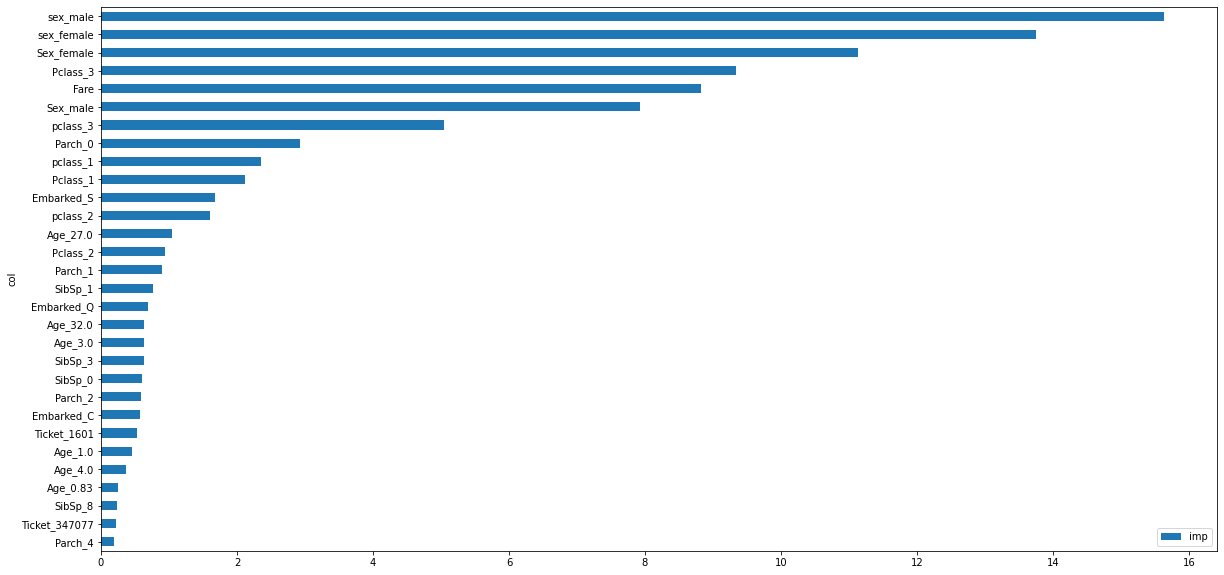

In [47]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)